<a href="https://colab.research.google.com/github/ug-newb/Internship-project/blob/main/InternProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=cd73a6e11b8e89a7eb1efea62f8534c8e1b18c0be90cebad0dbcda63bb72fc4e
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.read.csv('/content/sample_data/imdb.csv',
                    header = True,
                    inferSchema = True)
df.printSchema()

root
 |-- Poster_Link: string (nullable = true)
 |-- Series_Title: string (nullable = true)
 |-- Released_Year: string (nullable = true)
 |-- Certificate: string (nullable = true)
 |-- Runtime: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- IMDB_Rating: double (nullable = true)
 |-- Overview: string (nullable = true)
 |-- Meta_score: string (nullable = true)
 |-- Director: string (nullable = true)
 |-- Star1: string (nullable = true)
 |-- Star2: string (nullable = true)
 |-- Star3: string (nullable = true)
 |-- Star4: string (nullable = true)
 |-- No_of_Votes: string (nullable = true)
 |-- Gross: string (nullable = true)



In [ ]:
import pandas as pd
pd.DataFrame(df.take(9), columns=df.columns)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"


In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

In [ ]:
from pyspark.sql.functions import regexp_replace, col

df = df.withColumn('Gross', regexp_replace(col('Gross'), ',', ''))
df = df.withColumn('Gross', df['Gross'].cast('integer'))

In [ ]:
df.show(2)

+--------------------+--------------------+-------------+-----------+-------+------------+-----------+--------------------+----------+--------------------+-------------+--------------+----------+--------------+-----------+---------+
|         Poster_Link|        Series_Title|Released_Year|Certificate|Runtime|       Genre|IMDB_Rating|            Overview|Meta_score|            Director|        Star1|         Star2|     Star3|         Star4|No_of_Votes|    Gross|
+--------------------+--------------------+-------------+-----------+-------+------------+-----------+--------------------+----------+--------------------+-------------+--------------+----------+--------------+-----------+---------+
|https://m.media-a...|The Shawshank Red...|         1994|          A|142 min|       Drama|        9.3|Two imprisoned me...|        80|      Frank Darabont|  Tim Robbins|Morgan Freeman|Bob Gunton|William Sadler|    2343110| 28341469|
|https://m.media-a...|       The Godfather|         1972|          A

In [ ]:
categoricalColumns = ['Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']

In [ ]:
from pyspark.sql.functions import col

# Cast numerical columns to appropriate data types
df = df.withColumn("Released_Year", col("Released_Year").cast("int"))
df = df.withColumn("Meta_score", col("Meta_score").cast("int"))
df = df.withColumn("No_of_Votes", col("No_of_Votes").cast("int"))

In [ ]:
df.describe('Gross').show()

+-------+--------------------+
|summary|               Gross|
+-------+--------------------+
|  count|                 828|
|   mean|  6.64967066147343E7|
| stddev|1.0875494236146553E8|
|    min|              1305.0|
|    max|         9.3666221E8|
+-------+--------------------+



In [ ]:
df.describe('Gross').show()

+-------+-----------------+
|summary|            Gross|
+-------+-----------------+
|  count|              831|
|   mean|272456.8181818182|
| stddev|315488.7617525601|
|    min|        1,000,045|
|    max|    Orlando Bloom|
+-------+-----------------+



In [ ]:
stages = []
cols = df.columns
for categoricalCol in categoricalColumns:
  stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
  encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
  stages += [stringIndexer, encoder]

numericCols = ['Released_Year', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
assemblerInputs =numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features", handleInvalid="skip")
stages += [assembler]
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)

selectedCols = ['Gross', 'features']
df = df.select(selectedCols)
df.printSchema()

root
 |-- Gross: integer (nullable = true)
 |-- features: vector (nullable = true)



In [ ]:
df.show()

+---------+--------------------+
|    Gross|            features|
+---------+--------------------+
| 28341469|[1994.0,9.3,80.0,...|
|134966411|[1972.0,9.2,100.0...|
|534858444|[2008.0,9.0,84.0,...|
| 57300000|[1974.0,9.0,90.0,...|
|  4360000|[1957.0,9.0,96.0,...|
|377845905|[2003.0,8.9,94.0,...|
|107928762|[1994.0,8.9,94.0,...|
| 96898818|[1993.0,8.9,94.0,...|
|292576195|[2010.0,8.8,74.0,...|
| 37030102|[1999.0,8.8,66.0,...|
|315544750|[2001.0,8.8,92.0,...|
|330252182|[1994.0,8.8,82.0,...|
|  6100000|[1966.0,8.8,90.0,...|
|342551365|[2002.0,8.7,87.0,...|
|171479930|[1999.0,8.7,73.0,...|
| 46836394|[1990.0,8.7,90.0,...|
|290475067|[1980.0,8.7,82.0,...|
|112000000|[1975.0,8.7,83.0,...|
| 53367844|[2019.0,8.6,96.0,...|
|188020017|[2014.0,8.6,74.0,...|
+---------+--------------------+
only showing top 20 rows



In [ ]:
df=df.dropna()
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 525
Test Dataset Count: 211


In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='Gross', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train)

In [ ]:
# Perform predictions
lr_predictions = lr_model.transform(test)
lr_predictions.select("prediction","Gross","features").show(5)
# Evaluate prediction accuracy (R2)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Gross",metricName="r2")
print(lr_evaluator.evaluate(lr_predictions))

+-------------------+-----+--------------------+
|         prediction|Gross|            features|
+-------------------+-----+--------------------+
| -1239597.274826154| 1305|[2005.0,7.8,51.0,...|
| -553896.1274825037|19181|[1931.0,8.5,99.0,...|
|  667421.2005236149|50690|[1963.0,8.0,91.0,...|
|  1791895.678605467|50970|[1925.0,8.0,97.0,...|
|-295059.44849325716|57226|[1955.0,8.2,97.0,...|
+-------------------+-----+--------------------+
only showing top 5 rows

0.99991595194557


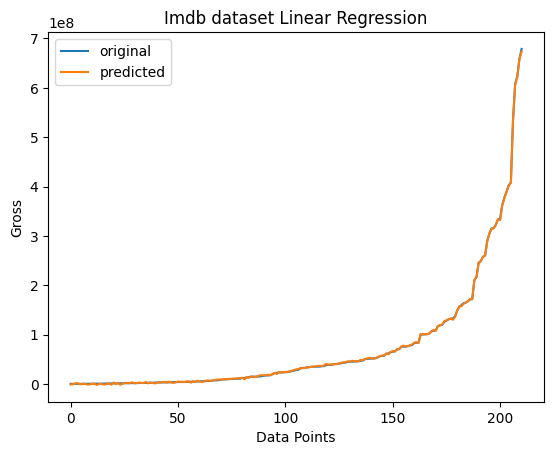

In [ ]:
import matplotlib.pyplot as plt
y_pred=lr_predictions.select("prediction").collect()
y_test=lr_predictions.select("Gross").collect()
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title('Imdb dataset Linear Regression')
plt.xlabel('Data Points')
plt.ylabel('Gross')
plt.legend()
plt.show()

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Gross')
dt_model = dt.fit(train)

In [ ]:
# Perform predictions
dt_predictions = dt_model.transform(test)
dt_predictions.show(5)

# Evaluate prediction accuracy (R2)
dt_evaluator = RegressionEvaluator(
    labelCol="Gross", predictionCol="prediction", metricName="r2")
r2 = dt_evaluator.evaluate(dt_predictions)
print(r2)

+-----+--------------------+-----------------+
|Gross|            features|       prediction|
+-----+--------------------+-----------------+
| 1305|[2005.0,7.8,51.0,...|961753.3571428572|
|19181|[1931.0,8.5,99.0,...|961753.3571428572|
|50690|[1963.0,8.0,91.0,...|961753.3571428572|
|50970|[1925.0,8.0,97.0,...|961753.3571428572|
|57226|[1955.0,8.2,97.0,...|961753.3571428572|
+-----+--------------------+-----------------+
only showing top 5 rows

0.8302351083292369


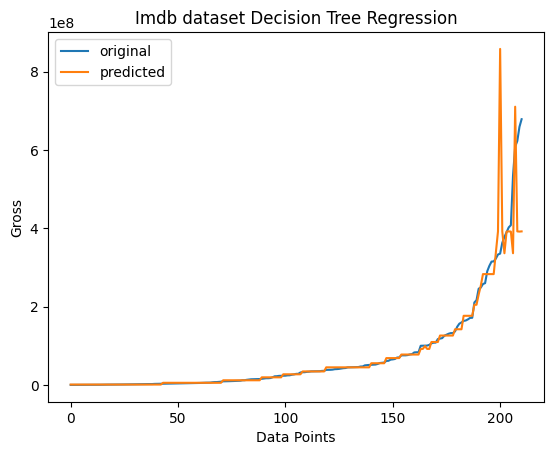

In [ ]:
import matplotlib.pyplot as plt
y_pred=dt_predictions.select("prediction").collect()
y_test=dt_predictions.select("Gross").collect()
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title('Imdb dataset Decision Tree Regression')
plt.xlabel('Data Points')
plt.ylabel('Gross')
plt.legend()
plt.show()

In [ ]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'Gross', maxIter=50)
gbt_model = gbt.fit(train)

In [ ]:
#Perform predictions
gbt_predictions = gbt_model.transform(test)
gbt_predictions.select('prediction', 'Gross', 'features').show(5)

# Evaluate prediction accuracy (R2)
gbt_evaluator = RegressionEvaluator(
    labelCol="Gross", predictionCol="prediction", metricName="r2")
r2 = gbt_evaluator.evaluate(gbt_predictions)
print(r2)

+------------------+-----+--------------------+
|        prediction|Gross|            features|
+------------------+-----+--------------------+
|149322.99893836782| 1305|[2005.0,7.8,51.0,...|
| 531810.7592203522|19181|[1931.0,8.5,99.0,...|
|-128652.5891154347|50690|[1963.0,8.0,91.0,...|
|311756.86097596784|50970|[1925.0,8.0,97.0,...|
|36695.075310488755|57226|[1955.0,8.2,97.0,...|
+------------------+-----+--------------------+
only showing top 5 rows

0.8317384038462403


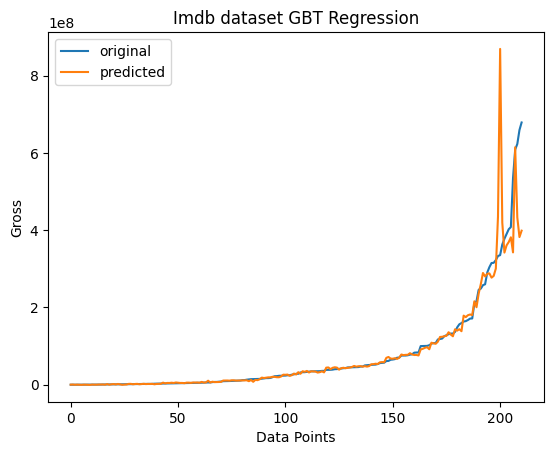

In [ ]:
import matplotlib.pyplot as plt
y_pred=gbt_predictions.select("prediction").collect()
y_test=gbt_predictions.select("Gross").collect()
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title('Imdb dataset GBT Regression')
plt.xlabel('Data Points')
plt.ylabel('Gross')
plt.legend()
plt.show()

# Data Science and Visualization

In [ ]:
!pip install chardet

In [ ]:
import chardet

In [ ]:
with open('/content/sample_data/imdb.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('/content/sample_data/imdb.csv', encoding=encoding)
df1.nunique()

Poster_Link      1000
Series_Title      999
Released_Year     100
Certificate        16
Runtime           140
Genre             202
IMDB_Rating        17
Overview         1000
Meta_score         63
Director          548
Star1             660
Star2             841
Star3             891
Star4             939
No_of_Votes       999
Gross             823
dtype: int64

In [ ]:
#Calculate the correlation matrix
correlation_matrix = df1.corr()

<ipython-input-32-1e9816ad0017>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


In [ ]:
df1=spark.read.csv('/content/sample_data/imdb.csv',header=True,inferSchema=True)
df1.printSchema()

root
 |-- Poster_Link: string (nullable = true)
 |-- Series_Title: string (nullable = true)
 |-- Released_Year: string (nullable = true)
 |-- Certificate: string (nullable = true)
 |-- Runtime: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- IMDB_Rating: double (nullable = true)
 |-- Overview: string (nullable = true)
 |-- Meta_score: string (nullable = true)
 |-- Director: string (nullable = true)
 |-- Star1: string (nullable = true)
 |-- Star2: string (nullable = true)
 |-- Star3: string (nullable = true)
 |-- Star4: string (nullable = true)
 |-- No_of_Votes: string (nullable = true)
 |-- Gross: string (nullable = true)



In [ ]:
from pyspark.sql.session import SparkSession
sess=SparkSession.builder.getOrCreate()
train=sess.read.csv('/content/sample_data/imdb.csv',header=True,inferSchema = True)
train.count()
train.printSchema()

df=train.toPandas()

root
 |-- Poster_Link: string (nullable = true)
 |-- Series_Title: string (nullable = true)
 |-- Released_Year: string (nullable = true)
 |-- Certificate: string (nullable = true)
 |-- Runtime: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- IMDB_Rating: double (nullable = true)
 |-- Overview: string (nullable = true)
 |-- Meta_score: string (nullable = true)
 |-- Director: string (nullable = true)
 |-- Star1: string (nullable = true)
 |-- Star2: string (nullable = true)
 |-- Star3: string (nullable = true)
 |-- Star4: string (nullable = true)
 |-- No_of_Votes: string (nullable = true)
 |-- Gross: string (nullable = true)



In [ ]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'].str.replace(',', ''), errors='coerce')

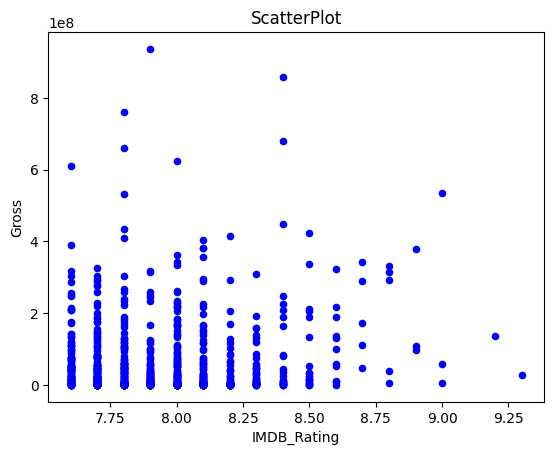

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind='scatter',
        x='IMDB_Rating',
        y='Gross',
        color='blue')

# set the title
plt.title('ScatterPlot')

# show the plot
plt.show()



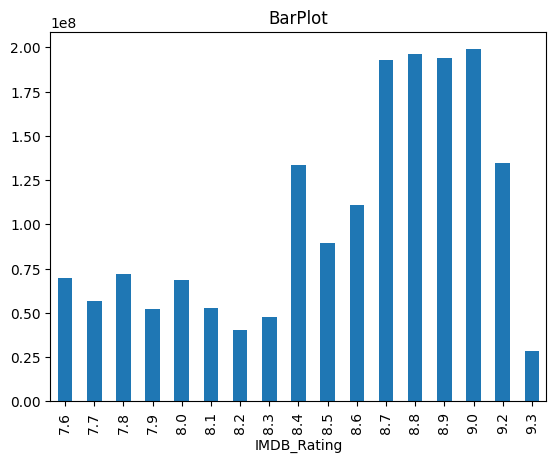

In [ ]:
ndf=df['Gross'].groupby(df['IMDB_Rating'])
ndf.mean().plot(kind='bar',
        x='IMDB_Rating',
        y='Gross')

# set the title
plt.title('BarPlot')

# show the plot
plt.show()

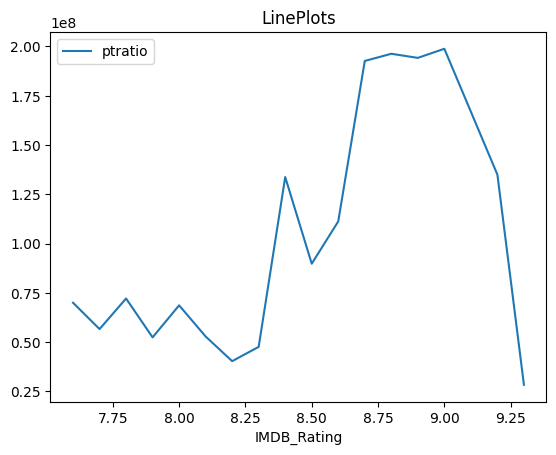

In [ ]:
grp=ndf.mean()
grp.plot(kind='line', x='IMDB_Rating',
        y='Gross',
         label='ptratio')

# set the title
plt.title('LinePlots')

plt.legend(loc='best')
plt.show()

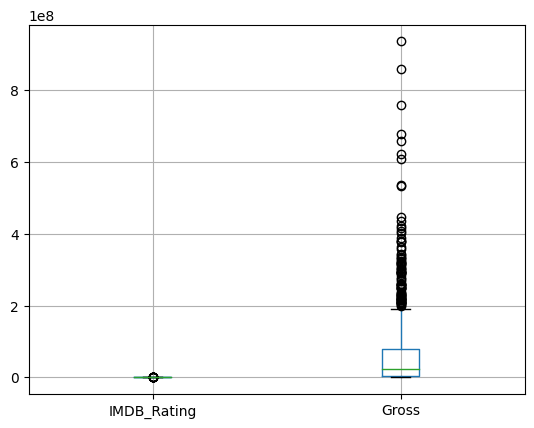

In [ ]:
df.boxplot(column=['IMDB_Rating','Gross'])
plt.show()

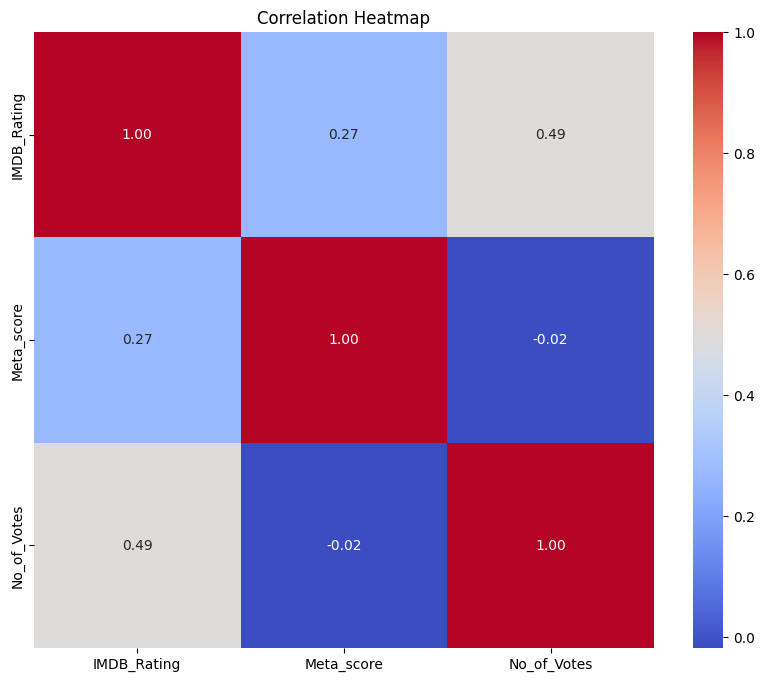

In [ ]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()